TASK 1

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning
The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

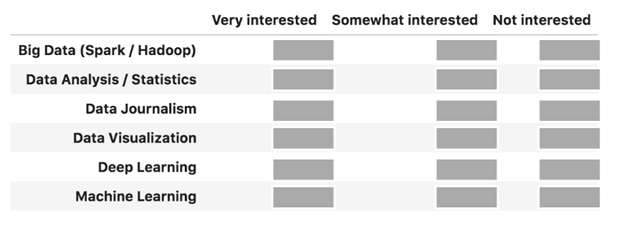

In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [2]:
# import libraries
import pandas as pd
import numpy as np

In [12]:
df_survey = pd.read_csv('https://cocl.us/datascience_survey_data',index_col=0, header=0)

In [13]:
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


TASK 2

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

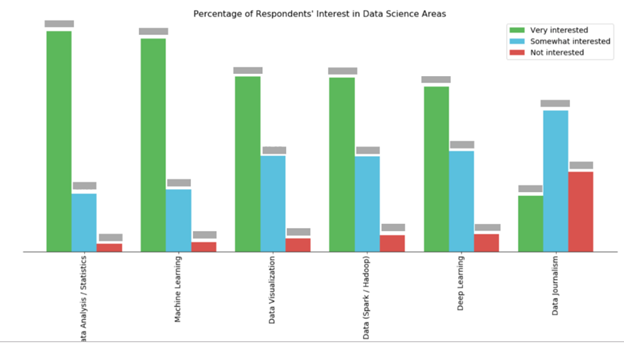

To create this bar chart, you can follow the following steps:
1.	Sort the dataframe in descending order of Very interested.
2.	Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
3.	As for the chart:
•	use a figure size of (20, 8),
•	bar width of 0.8,
•	use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
•	use font size 14 for the bar labels, percentages, and legend,
•	use font size 16 for the title, and,
•	display the percentages above the bars as shown above, and remove the left, top, and right borders.


In [3]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.2


In [15]:
# 1. Sort the dataframe in descending order on Very interested
df_survey.sort_values(by='Very interested' , ascending=False, axis=0, inplace=True)

df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [16]:
# Create a new dataframe to hold the percentages
df_percentages = pd.DataFrame(df_survey)
df_percentages

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [17]:
# 2. Convert the numbers into percentages of the total number of respondents. 
#    Recall that 2,233 respondents completed the survey. 
#    Round percentages to 2 decimal places.
total_respondents = 2233

df_percentages['Very interested'] = [((float(value) / total_respondents) * 100) for value in df_survey['Very interested']]
df_percentages['Very interested'] = np.round(df_percentages['Very interested'],decimals=2)

df_percentages['Somewhat interested'] = [((float(value) / total_respondents) * 100) for value in df_survey['Somewhat interested']]
df_percentages['Somewhat interested'] = np.round(df_percentages['Somewhat interested'],decimals=2)

df_percentages['Not interested'] = [((float(value) / total_respondents) * 100) for value in df_survey['Not interested']]
df_percentages['Not interested'] = np.round(df_percentages['Not interested'],decimals=2)

df_percentages

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


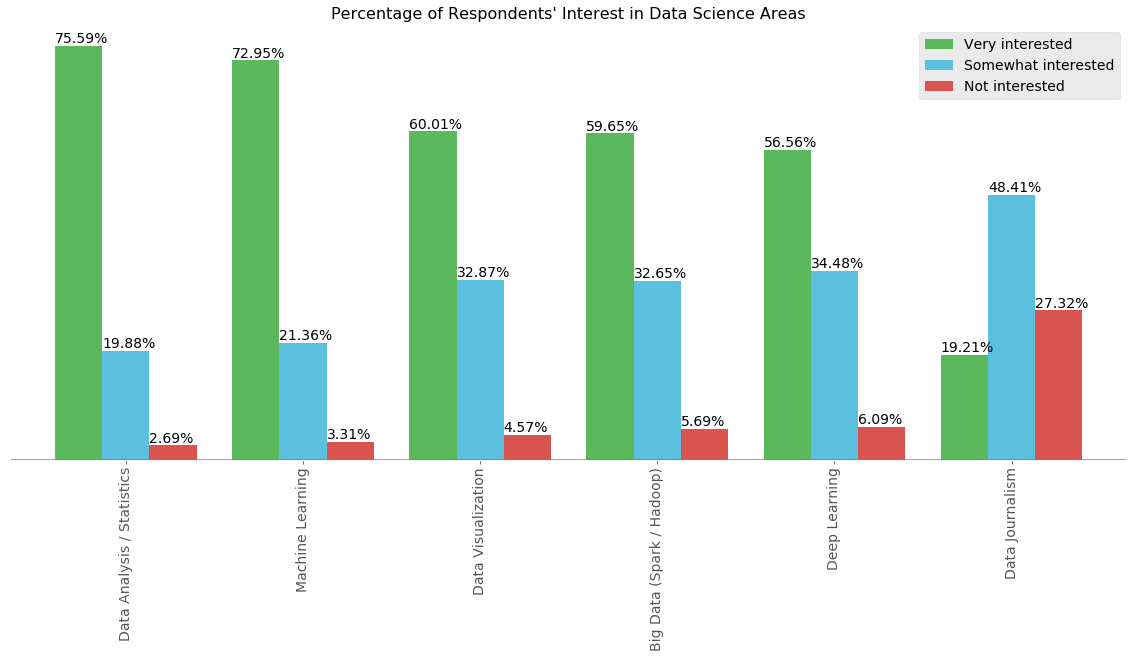

In [18]:
# 3. As for the chart:
#      a. use a figure size of (20, 8),
#      b. bar width of 0.8,
#      c. use color #5cb85c (green) for the Very interested bars, 
#             color #5bc0de (blue) for the Somewhat interested bars, 
#             and color #d9534f (red) for the Not interested bars,
#      d. use font size 14 for the bar labels, percentages, and legend,
#      e. use font size 16 for the title, and,
#      f. display the percentages above the bars as shown above, and remove the left, top, and right borders.

colors =['#5cb85c','#5bc0de', '#d9534f']   # c green (Very interested), blue (Somewhat interested), and red (Not interested)

ax = df_percentages.plot(kind='bar',  
             figsize=(20, 8),              # a figure size
             width=0.8,                    # b bar width
             color=colors)                 # c colors green, blue, and red

# Ticks
for tick in ax.xaxis.get_major_ticks():    # d font size of bar labels on x axis
    tick.label.set_fontsize(14)
ax.tick_params(left=False,labelleft=False) # remove ticks and labels on y axis

# Legend
ax.legend(fontsize=14)                     # d font size of legend

# Title
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16) # e font size of title

# Percentages labels
for i in ax.patches:                                                            # f display percentages above the bars
    ax.text(i.get_x(), i.get_height()+.5, str(i.get_height())+'%', fontsize=14) # determine text position, format text, specify font size
    
# Background and Borders
ax.set_facecolor("#ffffff")              # set the background to white
ax.axhline(color="gray")                 # set the x axis line to gray
ax.spines['top'].set_visible(False)      # f remove top border
ax.spines['right'].set_visible(False)    # f remove right border
ax.spines['left'].set_visible(False)     # fr remove left border  


TASK 3

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.
Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.
Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:
1.	Central,
2.	Southern,
3.	Bayview,
4.	Mission,
5.	Park,
6.	Richmond,
7.	Ingleside,
8.	Taraval,
9.	Northern, and,
10.	Tenderloin.
Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

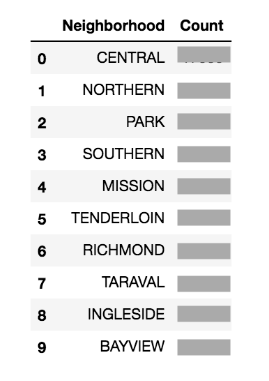

Once you are happy with your dataframe, upload a screenshot of your pandas dataframe. (5 marks)


In [125]:
df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [126]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [127]:
df_incidents.shape

(150500, 13)

In [128]:
# Create a new dataframe with just the neighborhoods and crimes from the original dataframe
df_crimes = pd.DataFrame (df_incidents, columns = ['PdDistrict'])
df_crimes.head()

,PdDistrict
0,SOUTHERN
1,SOUTHERN
2,BAYVIEW
3,TENDERLOIN
4,MISSION


In [129]:
df_crimes.tail()

,PdDistrict
150495,PARK
150496,CENTRAL
150497,CENTRAL
150498,CENTRAL
150499,SOUTHERN


In [130]:
# Ensure that all the rows have a value for PdDistrict
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 1 columns):
PdDistrict    150499 non-null object
dtypes: object(1)
memory usage: 1.1+ MB


In [131]:
# Ensure that the new dataframe has all the records of the original dataframe
df_crimes.shape

(150500, 1)

In [132]:
df_crimes.describe(include = 'all')

,PdDistrict
count,150499
unique,10
top,SOUTHERN
freq,28445


In [133]:
# Rename the columns
df_crimes.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)
df_crimes.columns

Index(['Neighborhood'], dtype='object')

In [134]:
df_crimes.head()

,Neighborhood
0,SOUTHERN
1,SOUTHERN
2,BAYVIEW
3,TENDERLOIN
4,MISSION


In [139]:
t = df_crimes['Neighborhood'].value_counts()
df_counts = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
df_counts.head(10)

,Count
SOUTHERN,28445
NORTHERN,20100
MISSION,19503
CENTRAL,17666
BAYVIEW,14303
INGLESIDE,11594
TARAVAL,11325
TENDERLOIN,9942
RICHMOND,8922
PARK,8699


In [140]:
# Assign output directly to a dataframe
df_crime_counts = df_counts.reset_index()
df_crime_counts.head(10)

,index,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [141]:
df_crime_counts.rename(columns={'index':'Neighborhood'}, inplace=True)
df_crime_counts.head(10)

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


TASK 4

Now you should be ready to proceed with creating the Choropleth map.
As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:
•	it is centered around San Francisco,
•	you use a zoom level of 12,
•	you use fill_color = 'YlOrRd',
•	you define fill_opacity = 0.7,
•	you define line_opacity=0.2, and,
•	you define a legend and use the default threshold scale.
If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:

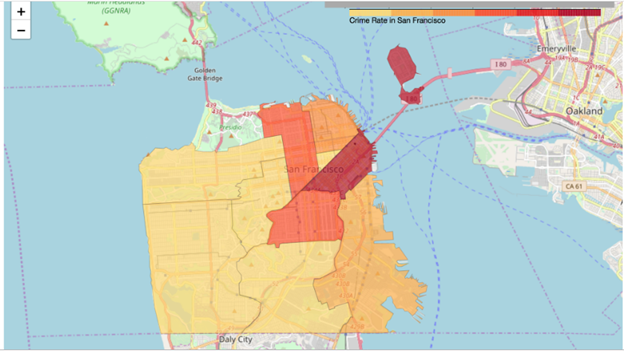

Once you are ready to submit your map, please upload a screenshot of your Choropleth map. (5 marks)

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

In [21]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [22]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [23]:
# download geojson file
!wget --quiet https://cocl.us/sanfran_geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [24]:
# set geo_data variable
san_fran_geo = r'sanfran_geojson' # geojson file

# construct map in folium
san_fran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [25]:
# Construct the Choropleth map and display
san_fran_map.choropleth(
    geo_data=san_fran_geo,
    data=df_crime_counts,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime in San Francisco'
)

# display map
san_fran_map